Github: https://github.com/WenqingZhu01

### Predictive Analytics in Banking: Logistic Regression for Customer Churn

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Ingest data from csv

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

#### Data Wrangling

In [3]:
# Drop unnecessary columns 
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df.drop(drop_cols, axis=1, inplace=True)

# Check empty and Make the output as a line
missing_values = df.isnull().sum()
missing_values_str = ', '.join(f"{index}: {value}" for index, value in missing_values.items()) 
print(missing_values_str)

# Check duplication
duplicate = df.duplicated().sum()
print("There are %d duplicate data point(s)" % duplicate)

CreditScore: 0, Geography: 0, Gender: 0, Age: 0, Tenure: 0, Balance: 0, NumOfProducts: 0, HasCrCard: 0, IsActiveMember: 0, EstimatedSalary: 0, Exited: 0
There are 0 duplicate data point(s)


#### Visulization

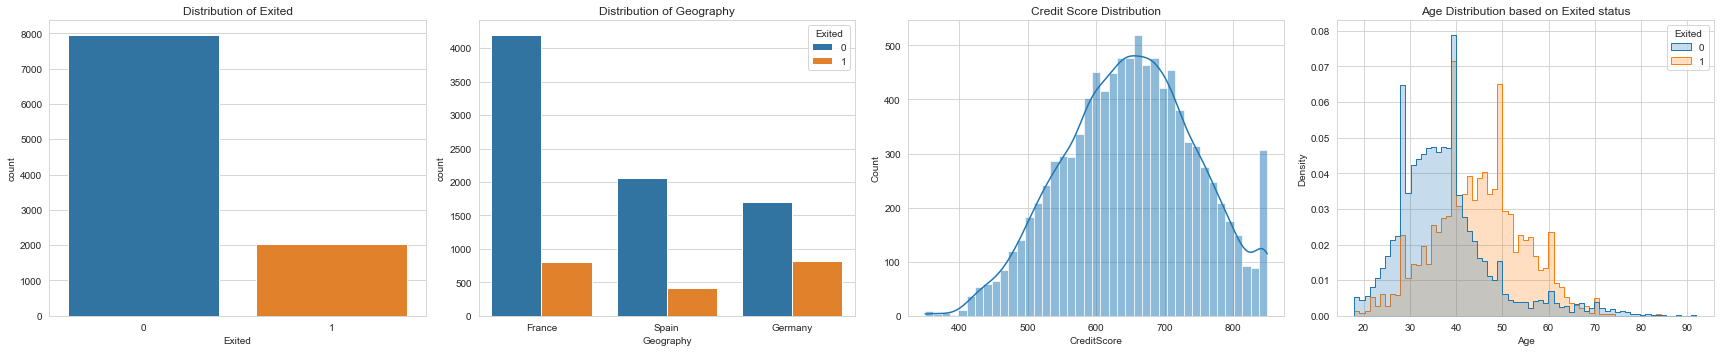

In [4]:
sns.set_style("whitegrid")
# Set up the figure and subplots
plt.figure(figsize=(24, 5))

# Distribution of 'Exited'
plt.subplot(1, 4, 1)
sns.countplot(data=df, x='Exited')  # 1-Churned; 0-Not Churned
plt.title('Distribution of Exited')

# Distribution of Geopraphy
plt.subplot(1, 4, 2)
sns.countplot(x='Geography',hue='Exited',data=df)
plt.title('Distribution of Geography')

# Credit Score Distribution
plt.subplot(1, 4, 3)
sns.histplot(data=df, x='CreditScore', kde=True)
plt.title('Credit Score Distribution')

# Age Distribution based on 'Exited' status
plt.subplot(1, 4, 4)
sns.histplot(data=df, x='Age', hue='Exited', element='step', stat="density", common_norm=False)
plt.title('Age Distribution based on Exited status')

plt.tight_layout()  
plt.show()

1. Exited Distribution: Most customers choose to stay with the bank.
2. Geography Distribution: Illustrate churn distribution across countries. Germany has higher exit rates.
3. Credit Score Distribution: See if there's a common credit score range where customers are more likely to churn.
4. Age Distribution by Churn: Highlight 40-50 age groups that are more prone to leaving the service.

#### Manage different data types

In [5]:
# View the data types and Make the output as a line
dtypes_str = ', '.join(f"{col}: {dtype}" for col, dtype in df.dtypes.iteritems())
print(dtypes_str)

CreditScore: int64, Geography: object, Gender: object, Age: int64, Tenure: int64, Balance: float64, NumOfProducts: int64, HasCrCard: int64, IsActiveMember: int64, EstimatedSalary: float64, Exited: int64


In [6]:
# One-hot encode Geography and Gender
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

#### Data Analysis

In [7]:
# Use logistic regression as a simple model
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy of the Logistic Regression model:", accuracy_score(y_test, y_pred))

Accuracy of the Logistic Regression model: 0.8005


#### Conclusion
The logistic regression model is a relatively simple yet effective baseline for the task of predicting customer churn. 
With an accuracy of just over 80%, the model is likely capturing some of the patterns in the data that are indicative of churn. 
However, depending on the complex business context, further evaluation metrics (eg. precision, recall, F1 score, and the area under the ROC curve) should  be considered for a more comprehensive evaluation.